In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [3]:
df = pd.read_csv("day.csv")
df.shape

(730, 16)

In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


Dropping instant,dteday columns in initial itself as these values are nothing but index and dteday has already month and year representation dates of the days wont be that much useful, hnece dropping these for now

In [5]:
df.drop(["instant"], axis = 1, inplace = True)

In [6]:
df.drop(["dteday"], axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [8]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


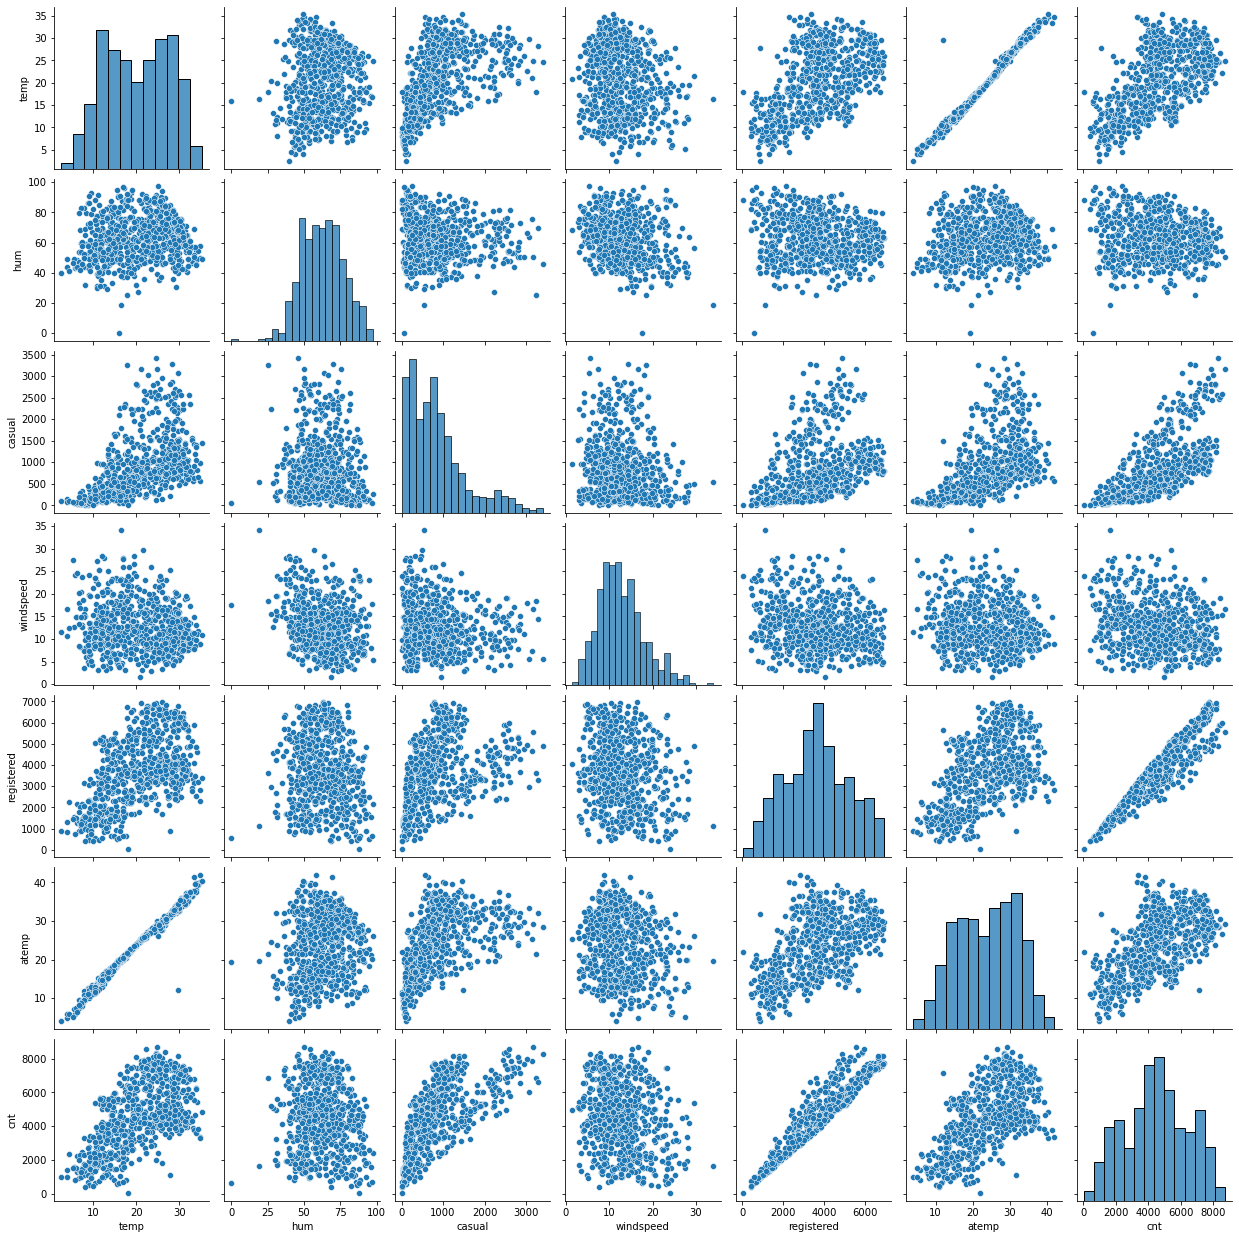

In [9]:
sns.pairplot(df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt'])
plt.show()

Q: Looking at the pair-plot among the numerical variables, which one has the highest correlation
with the target variable?

Ans: highest correlation noted with "registerd" variable as per initial analysis but registered is nothing but another form for target variable so not considering that and from plot iit is evident that "temp" variable has the highest correlation with target variable

##  Data Preparation:

In [10]:
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})


In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Performing EDA to Understand the Data

### Univariate Analysis

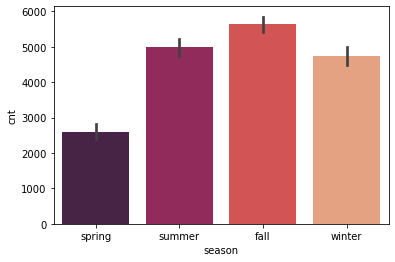

In [12]:
sns.barplot('season','cnt',data=df,palette="rocket",)
plt.show()

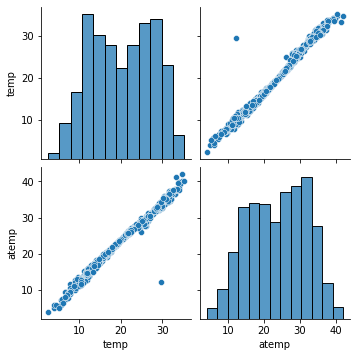

In [13]:
sns.pairplot(df[['temp','atemp']])
plt.show()

Predictor columns temp and atemp are likely correlated to each other, so we drop "atemp" keeping any one is fine

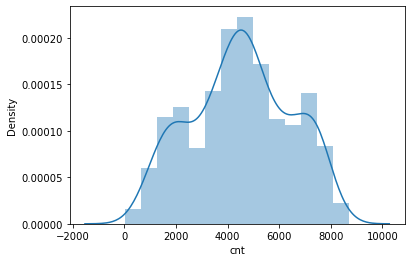

In [14]:
sns.distplot(df["cnt"] )
plt.show()

The target variable(cnt) is the sum of the both registered and casual columns,So these columns are not usefull to predict target variable we can drop these columns to avoid multicollinearity, So dropping these columns 'casual' and 'registered' along with "atemp" too:

In [15]:
df.drop(['casual','registered','atemp'],axis=1,inplace=True)

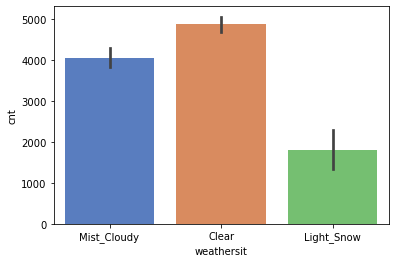

In [16]:
sns.barplot('weathersit','cnt',data=df, palette="muted")
plt.show()

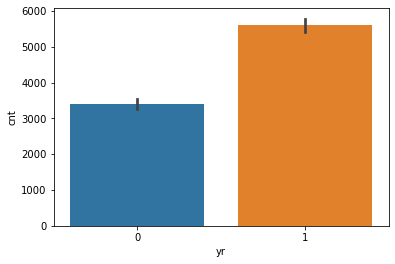

In [17]:
sns.barplot('yr','cnt',data=df)
plt.show()

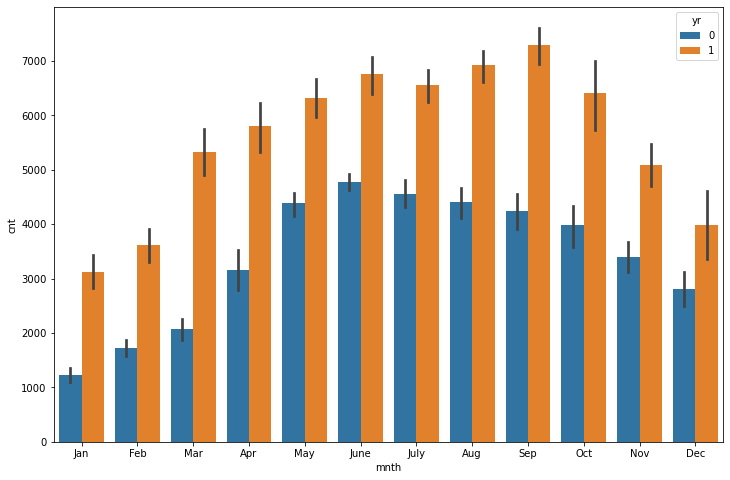

In [18]:
plt.figure(figsize = (12,8))
sns.barplot('mnth','cnt',hue='yr',data=df)
plt.show()

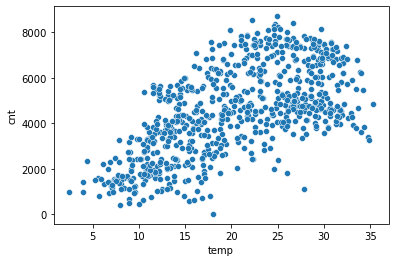

In [19]:
sns.scatterplot(x='temp',y='cnt' ,data=df)
plt.show()

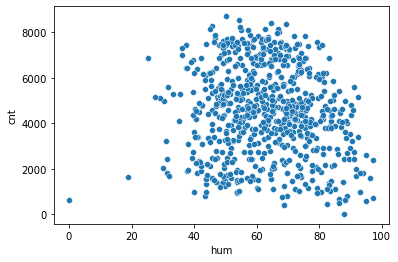

In [20]:
sns.scatterplot(x='hum', y='cnt',data=df)
plt.show()

In [21]:
var = ["temp","hum","windspeed","cnt" ]
df[var].head()

,temp,hum,windspeed,cnt
0,14.110847,80.5833,10.749882,985
1,14.902598,69.6087,16.652113,801
2,8.050924,43.7273,16.636703,1349
3,8.200000,59.0435,10.739832,1562
4,9.305237,43.6957,12.522300,1600


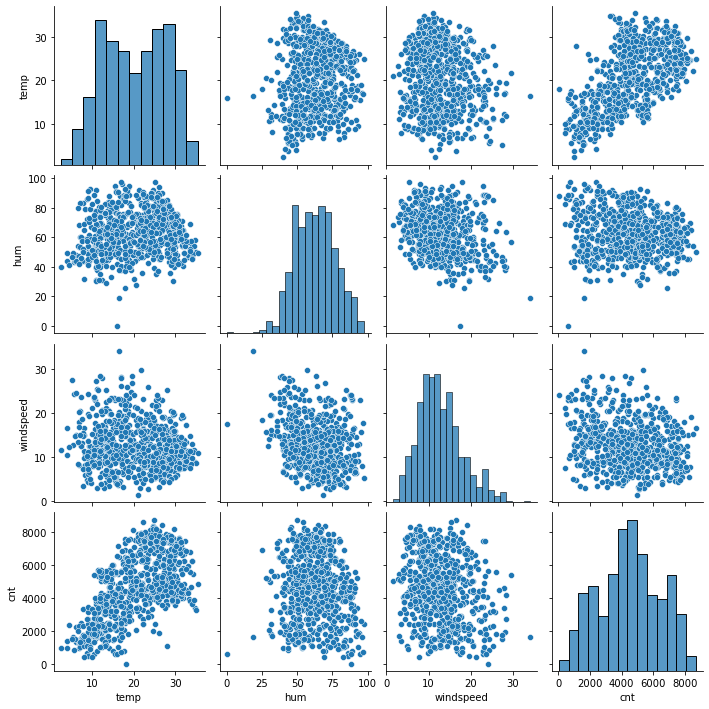

In [22]:
sns.pairplot(df[var])
plt.show()

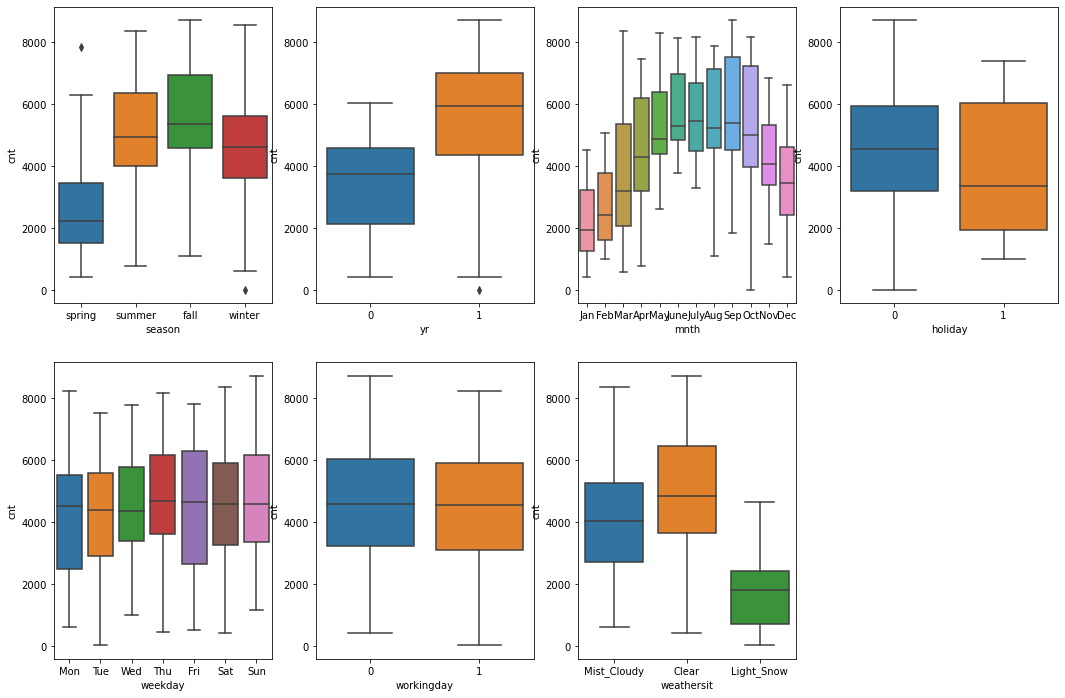

In [23]:
plt.figure(figsize = (18,12))
plt.subplot(2,4,1)
sns.boxplot(x="season", y= "cnt", data= df )
plt.subplot(2,4,2)
sns.boxplot(x="yr", y= "cnt", data= df )
plt.subplot(2,4,3)
sns.boxplot(x="mnth", y= "cnt", data= df )
plt.subplot(2,4,4)
sns.boxplot(x="holiday", y= "cnt", data= df )
plt.subplot(2,4,5)
sns.boxplot(x="weekday", y= "cnt", data= df )
plt.subplot(2,4,6)
sns.boxplot(x="workingday", y= "cnt", data= df )
plt.subplot(2,4,7)
sns.boxplot(x="weathersit", y= "cnt", data= df )
plt.show()

Q: From your analysis of the categorical variables from the dataset, what could you infer about
their effect on the dependent variable?

Ans: From the above observations from boxplot and heat maps
    > The year box plots indicates that more bikes are rent during 2019.
    > The season box plots indicates that more bikes are rent during fall season.
    > The working day and holiday box plots indicate that more bikes are rent during normal working days than on weekends or holidays.
    > The month box plots indicates that more bikes are rent during september month.
    > The weathersit box plots indicates that more bikes are rent during Clear, Few clouds, Partly cloudy weather.

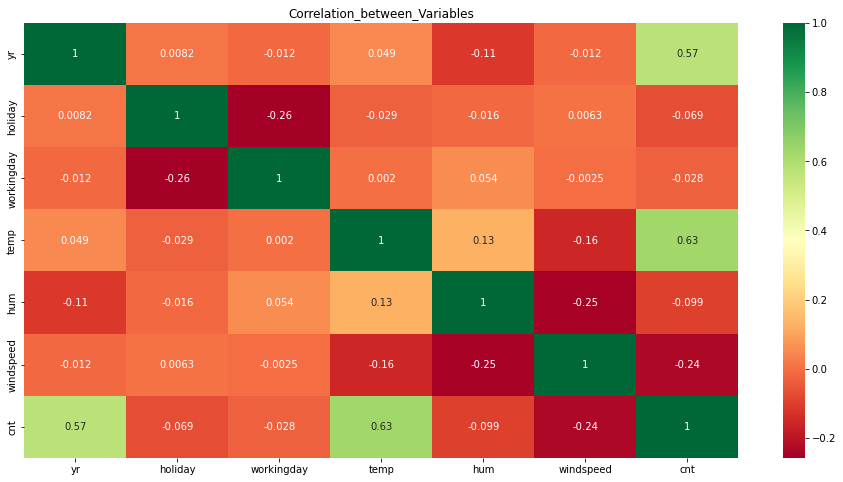

In [24]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation_between_Variables")
plt.show()

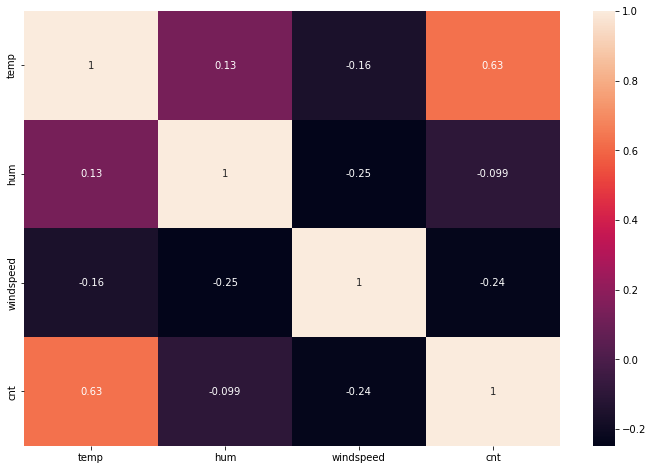

In [25]:
corr_df= df[['temp','hum','windspeed','cnt']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

In [26]:
df.shape

(730, 11)

 ### Creating Dummy Variables


In [27]:
df = pd.get_dummies(data=df, columns=['season', 'mnth','yr','weekday','weathersit'], drop_first = True)


Q: Why is it important to use drop_first=True during dummy variable creation?

Ans: it is important to use  drop_first function, as it helps in reducing the extra column created during dummy variable creation.

In [28]:
df.shape

(730, 29)

In [29]:
df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Splitting Data into Train and Test Sets:

In [31]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
print("Train dataframe : ",df_train.shape)
print("Test dataframe : ",df_test.shape)

Train dataframe :  (510, 29)
Test dataframe :  (219, 29)


### Re-scaling the numerical features using Standard Scaler

In [33]:
scale = StandardScaler()

In [34]:
scale_columns=['cnt','temp','hum','windspeed']
df_train[scale_columns] = scale.fit_transform(df_train[scale_columns])

In [35]:
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
576,0,1,1.231731,0.516433,-0.330615,1.399629,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
426,0,0,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
728,0,1,-1.294913,-1.045032,2.018143,-1.379511,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,-0.136589,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


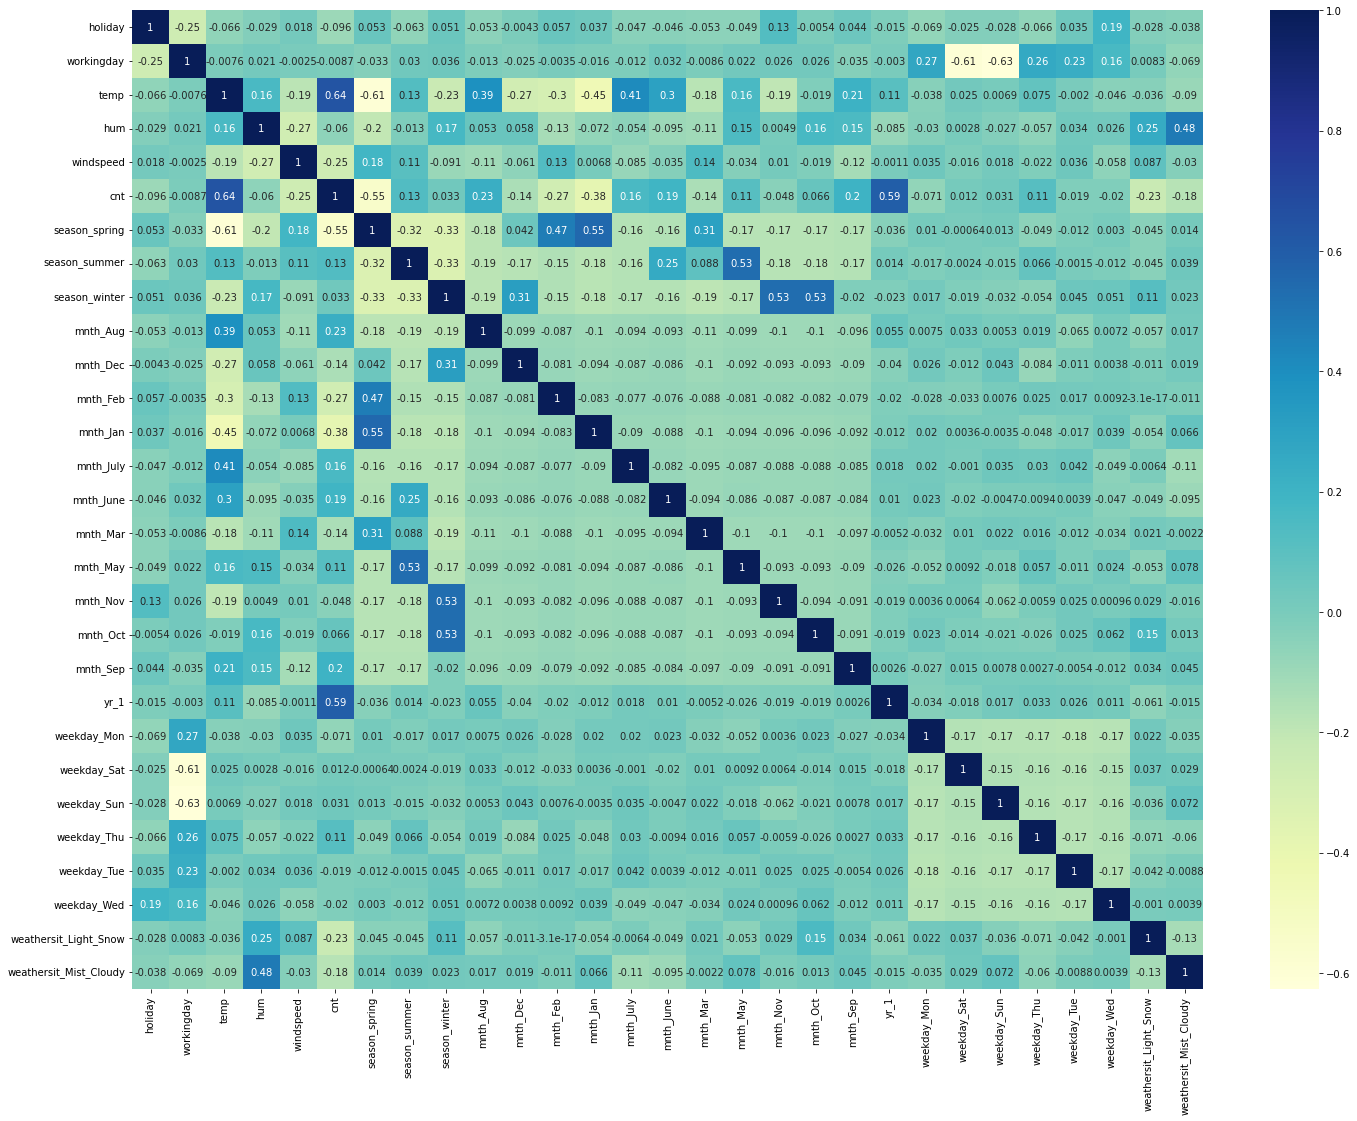

In [36]:
plt.figure(figsize = (24, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing data into X and Y sets for the model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
X_train.shape

(510, 28)

In [39]:
y_train.shape


(510,)

# Building the linear model:

In [40]:
X_train_lm = sm.add_constant(X_train)

In [41]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [42]:
lr.params

const                    -0.181738
holiday                  -0.603568
workingday               -0.269749
temp                      0.447940
hum                      -0.102182
windspeed                -0.138387
season_spring            -0.194787
season_summer             0.188271
season_winter             0.494254
mnth_Aug                  0.095854
mnth_Dec                 -0.203542
mnth_Feb                 -0.166147
mnth_Jan                 -0.283510
mnth_July                -0.155588
mnth_June                 0.004343
mnth_Mar                  0.002710
mnth_May                  0.107251
mnth_Nov                 -0.185204
mnth_Oct                  0.025805
mnth_Sep                  0.383537
yr_1                      1.028901
weekday_Mon              -0.109786
weekday_Sat              -0.251007
weekday_Sun              -0.222672
weekday_Thu               0.017218
weekday_Tue              -0.117212
weekday_Wed              -0.050099
weathersit_Light_Snow    -1.120953
weathersit_Mist_Clou

In [43]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.33e-179
Time:                        22:24:23   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             534.7
Df Residuals:                     481   BIC:                             657.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,38.71
5,season_spring,13.52
7,season_winter,12.53
6,season_summer,9.73
22,weekday_Sun,7.75
21,weekday_Sat,7.43
16,mnth_Nov,7.17
2,temp,7.11
17,mnth_Oct,6.81
8,mnth_Aug,6.46


### Dropping the Variable and Updating the Model:

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05

In [45]:
X_train=X_train.drop('mnth_Mar', 1)

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.24e-180
Time:                        22:24:24   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             532.7
Df Residuals:                     482   BIC:                             651.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [47]:
X_train = X_train.drop('mnth_June', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [48]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.08e-181
Time:                        22:24:24   Log-Likelihood:                -238.36
No. Observations:                 510   AIC:                             530.7
Df Residuals:                     483   BIC:                             645.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [49]:
X_train=X_train.drop('mnth_Oct', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.90e-182
Time:                        22:24:24   Log-Likelihood:                -238.38
No. Observations:                 510   AIC:                             528.8
Df Residuals:                     484   BIC:                             638.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [51]:
X_train=X_train.drop('weekday_Thu', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [52]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          3.71e-183
Time:                        22:24:24   Log-Likelihood:                -238.41
No. Observations:                 510   AIC:                             526.8
Df Residuals:                     485   BIC:                             632.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [53]:
X_train=X_train.drop('weekday_Sun', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.37e-184
Time:                        22:24:24   Log-Likelihood:                -238.70
No. Observations:                 510   AIC:                             525.4
Df Residuals:                     486   BIC:                             627.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

 checking the VIFs once again for the model

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,6.63
5,season_spring,5.23
2,temp,4.33
7,season_winter,3.74
6,season_summer,3.34
11,mnth_Jan,2.55
22,weathersit_Mist_Cloudy,2.31
16,yr_1,2.09
8,mnth_Aug,2.04
10,mnth_Feb,1.98


In [56]:
X_train=X_train.drop('workingday', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.06e-185
Time:                        22:24:25   Log-Likelihood:                -238.99
No. Observations:                 510   AIC:                             524.0
Df Residuals:                     487   BIC:                             621.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [58]:
X_train=X_train.drop('weekday_Sat', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.36e-186
Time:                        22:24:26   Log-Likelihood:                -238.99
No. Observations:                 510   AIC:                             522.0
Df Residuals:                     488   BIC:                             615.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [60]:
X_train=X_train.drop('mnth_Aug', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          5.05e-187
Time:                        22:24:26   Log-Likelihood:                -239.33
No. Observations:                 510   AIC:                             520.7
Df Residuals:                     489   BIC:                             609.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [62]:
X_train=X_train.drop('weekday_Wed', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          8.12e-188
Time:                        22:24:26   Log-Likelihood:                -240.04
No. Observations:                 510   AIC:                             520.1
Df Residuals:                     490   BIC:                             604.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [64]:
X_train=X_train.drop('mnth_May', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()


In [65]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.44e-188
Time:                        22:24:27   Log-Likelihood:                -240.88
No. Observations:                 510   AIC:                             519.8
Df Residuals:                     491   BIC:                             600.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [66]:
X_train=X_train.drop('mnth_Feb', 1)
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.84e-189
Time:                        22:24:27   Log-Likelihood:                -242.42
No. Observations:                 510   AIC:                             520.8
Df Residuals:                     492   BIC:                             597.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,season_spring,2.84
1,temp,2.82
6,season_winter,2.75
16,weathersit_Mist_Cloudy,2.13
12,yr_1,2.02
10,mnth_Nov,1.84
2,hum,1.80
8,mnth_Jan,1.78
7,mnth_Dec,1.54
5,season_summer,1.49


The model lr_11 looks clean as there are no p-values >0.05 and all the VIF values are less than 5.

# Residual Analysis of the train data:

In [69]:
y_train_pred = lr_11.predict(X_train_lm)

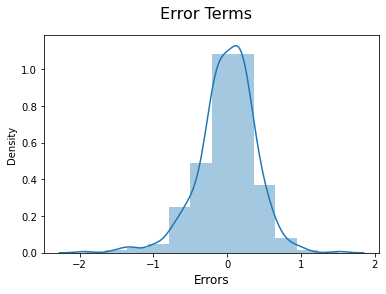

In [70]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 12)
fig.suptitle('Error Terms', fontsize = 16)
plt.xlabel('Errors', fontsize = 12)
plt.show()

From the above picture it is evident that the residual values fit perfectly in the model as no outliers are visible

# Making Predictions Using the Final Model:

In [71]:
num_columns=['cnt','temp','hum','windspeed']
df_test[num_columns] = scale.transform(df_test[num_columns])

In [72]:
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,yr_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow,weathersit_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,0.096083,-0.081388,-0.043731,0.031073,0.255708,0.264840,0.232877,0.059361,...,0.086758,0.479452,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.188034,0.481313,1.035793,1.022197,0.942916,0.973536,0.437258,0.442259,0.423633,0.236840,...,0.282125,0.500722,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,-2.174744,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.809372,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.094973,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.983209,0.641963,0.485055,0.709202,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.981904,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_test.shape

(219, 28)

In [75]:
y_test.shape

(219,)

In [76]:
X_test_m = sm.add_constant(X_test)

In [77]:
X_train.columns

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July', 'mnth_Nov',
       'mnth_Sep', 'yr_1', 'weekday_Mon', 'weekday_Tue',
       'weathersit_Light_Snow', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [78]:
X_test_m.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'yr_1',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light_Snow',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [79]:
# Creating X_test_m dataframe by dropping variables from X_test_m as we are aware of required columns through train model:

drop_col= ['mnth_Mar','mnth_June','mnth_Oct','weekday_Thu','weekday_Sun','workingday','weekday_Sat',
             'mnth_Aug','weekday_Wed','mnth_May','mnth_Feb']
X_test_m = X_test_m.drop(drop_col, axis = 1)

In [80]:
y_pred_m = lr_11.predict(X_test_m)

#  Model Evaluation:

Let's plot the graph for actual versus predicted values.

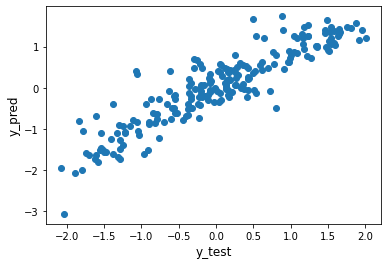

In [81]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)              
plt.xlabel('y_test', fontsize = 12)                          
plt.ylabel('y_pred', fontsize = 12)
plt.show()

Q: How did you validate the assumptions of Linear Regression after building the model on the
training set?

Ans: This can be validated by plotting a scatter plot between the features and the target

# R-squared score

In [82]:
from sklearn.metrics import r2_score

print('Train R-Score: ' ,r2_score(y_train,y_train_pred))  
print('Test R-Score: ' ,r2_score(y_test, y_pred_m))

Train R-Score:  0.8485060124356757
Test R-Score:  0.825211983201792


In [83]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          4.84e-189
Time:                        22:24:38   Log-Likelihood:                -242.42
No. Observations:                 510   AIC:                             520.8
Df Residuals:                     492   BIC:                             597.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### We can see that the equation for best fitted line is:


cnt = 0.47 X temp -0.41 X holiday -0.09 X hum -0.13 X windspeed -0.27 X season_spring  0.18 X season_summer 0.46 X season_winter  -0.17 X mnth_Dec  -0.19 X mnth_Jan -0.22 X mnth_July -0.18 X mnth_Nov  0.33 X mnth_Sep 1.02 X yr_1 -0.11 X weekday_Mon -0.12 X weekday_Tue -1.12 X weathersit_Light_Snow -0.25 X weathersit_Mist_Cloudy

Q: Based on the final model, which are the top 3 features contributing significantly towards
explaining the demand of the shared bikes?

Ans: From the model these three Yr_1(2019),Temp(temperature), season_winter(winter season) took the major share to represent positive significance for demand 

***The End***